# Trablho de Conclusão de Curso - UNIVESP - 1S/2025- Notebook 4

# Código: tcc530-sala-002grupo-002

## 1.0 Packges

### Packges Import

In [1]:
# Packages

# Bibliotecas Gerais
import numpy                   as np
import pandas                  as pd
import matplotlib.pyplot       as plt
import seaborn                 as sns
from pandas import to_datetime

# Bibliotecas de Séries Temporais
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from scipy.stats import uniform
from prophet import Prophet
from mango import scheduler, Tuner

### Packges Version Control

In [2]:
pip freeze --local > ../requeriments/requeriments_not4.txt

Note: you may need to restart the kernel to use updated packages.


## 2.0 Data Read

In [3]:
link   = '../dados/dados_ts.csv'
df_ts = pd.read_csv(link,sep=",",low_memory=False)

In [4]:
df_ts.head(5)

,MUNICIPIO,REGIAO,DT_NOTIFIC,Ano da notificação,Classificação final do caso
0,Mairiporã,São Paulo,2014-03-17,2014,1
1,Campinas,Campinas,2014-05-12,2014,1
2,São Paulo,São Paulo,2014-04-21,2014,1
3,São Paulo,São Paulo,2014-04-23,2014,1
4,Campinas,Campinas,2014-05-14,2014,1


In [51]:
locsave = 'figures/ts/'

## 3.0 Data Preparing

### 3.1 SP - Full

In [52]:
df_sp_full = df_ts.groupby(['DT_NOTIFIC'])['Classificação final do caso'].sum().reset_index()
df_sp_full.columns = ['ds','y']
df_sp_full['ds']= to_datetime(df_sp_full['ds'])
df_sp_full.head(5)

,ds,y
0,2013-12-29,2
1,2013-12-30,5
2,2014-01-01,3
3,2014-01-02,23
4,2014-01-03,27


## 3.2 Por Regiões - SP

In [53]:
regioes = df_ts['REGIAO'].unique()

In [54]:
ldfreg = []

for k1 in range(0,len(regioes)):
    
    mask = df_ts['REGIAO'] == regioes[k1]
    dftemp = df_ts[mask]
    dftemp = dftemp.groupby(['DT_NOTIFIC'])['Classificação final do caso'].sum().reset_index()
    dftemp.columns = ['ds','y']
    dftemp['ds']= to_datetime(dftemp['ds'])
    ldfreg.append(dftemp)

## 4.0 ML Models

### 4.1 SP - Full

In [55]:
model = Prophet()
model.fit(df_sp_full)

16:56:22 - cmdstanpy - INFO - Chain [1] start processing
16:56:23 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
future = list()

for i in range(1, 13):
    dfm = 31
    if(i==2): dfm = 28
    for j in range(1,dfm):
    	date = '2024-%d-%d' % (i,j)
    	future.append([date])

for i in range(1, 13):
    dfm = 31
    if(i==2): dfm = 28
    for j in range(1,dfm):
    	date = '2025-%d-%d' % (i,j)
    	future.append([date])
        
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

          ds        yhat  yhat_lower   yhat_upper
0 2024-01-01  864.018777 -298.028640  1931.086397
1 2024-01-02  740.188250 -278.252402  1827.093665
2 2024-01-03  731.481429 -437.034130  1776.556772
3 2024-01-04  699.708708 -425.124753  1789.120038
4 2024-01-05  633.757879 -459.150327  1807.093922


<Figure size 640x480 with 0 Axes>

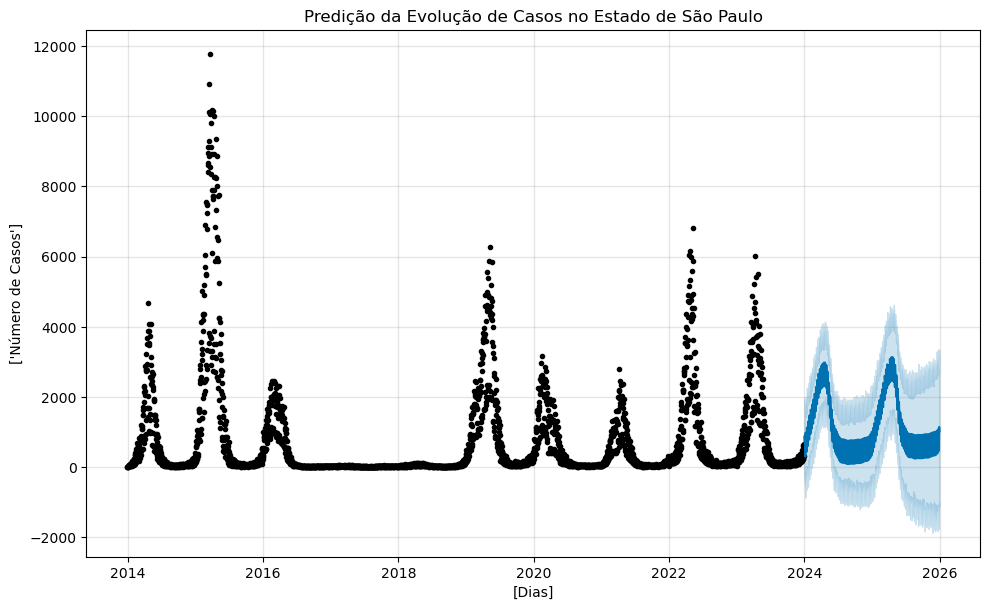

In [62]:
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
plt.figure()
fig = model.plot(forecast)
plt.xlabel('[Dias]')
plt.ylabel(['Número de Casos'])
plt.title('Predição da Evolução de Casos no Estado de São Paulo')
plt.show()
fig.savefig('%s/predicaots_fullsp.png'%(locsave),dpi=400,bbox_inches='tight')
plt.close()

### 4.2 SP - Regiões

17:00:19 - cmdstanpy - INFO - Chain [1] start processing
17:00:19 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 640x480 with 0 Axes>

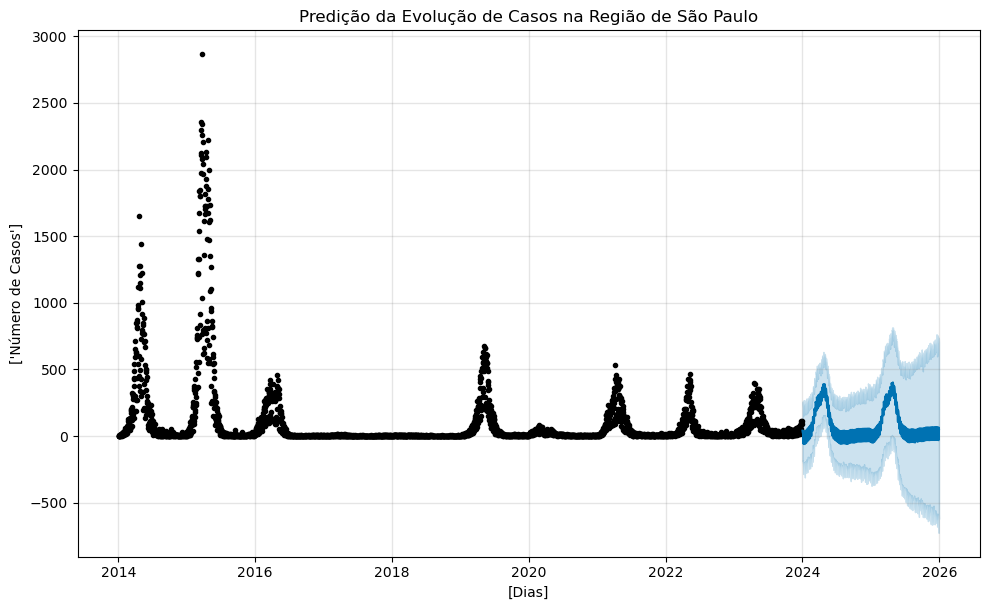

17:00:20 - cmdstanpy - INFO - Chain [1] start processing
17:00:21 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 640x480 with 0 Axes>

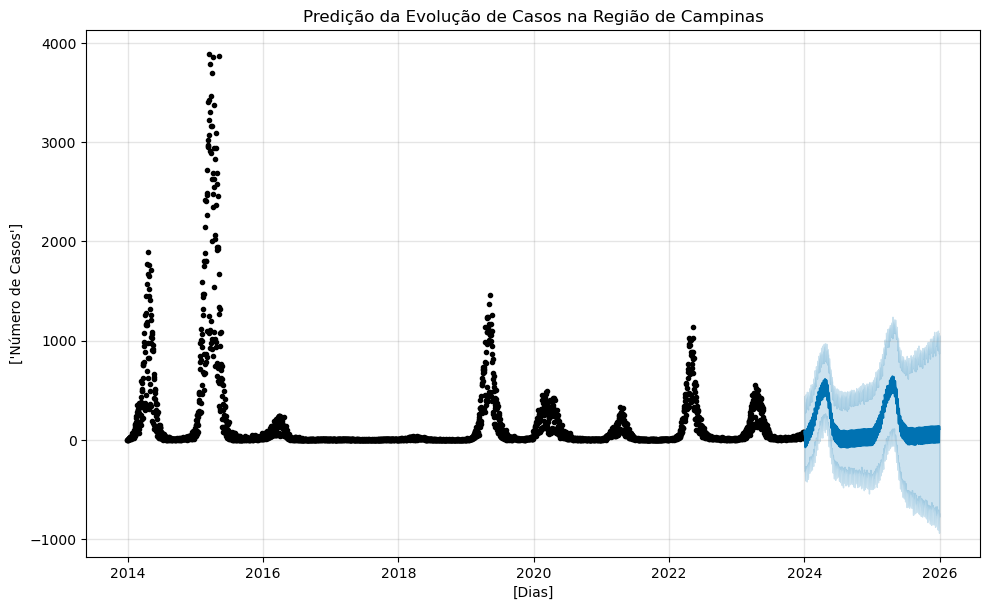

17:00:22 - cmdstanpy - INFO - Chain [1] start processing
17:00:22 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 640x480 with 0 Axes>

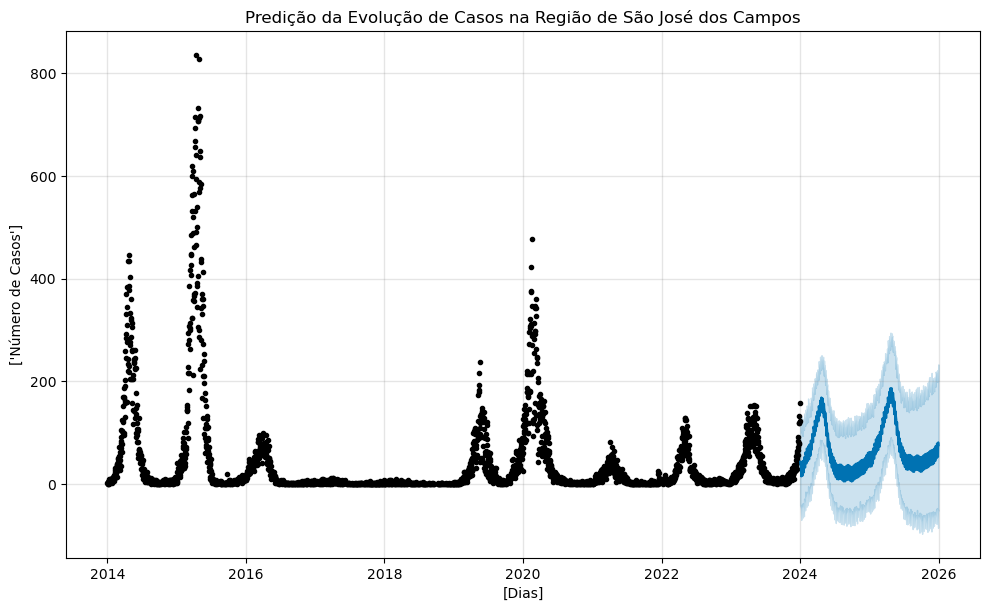

17:00:22 - cmdstanpy - INFO - Chain [1] start processing
17:00:23 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 640x480 with 0 Axes>

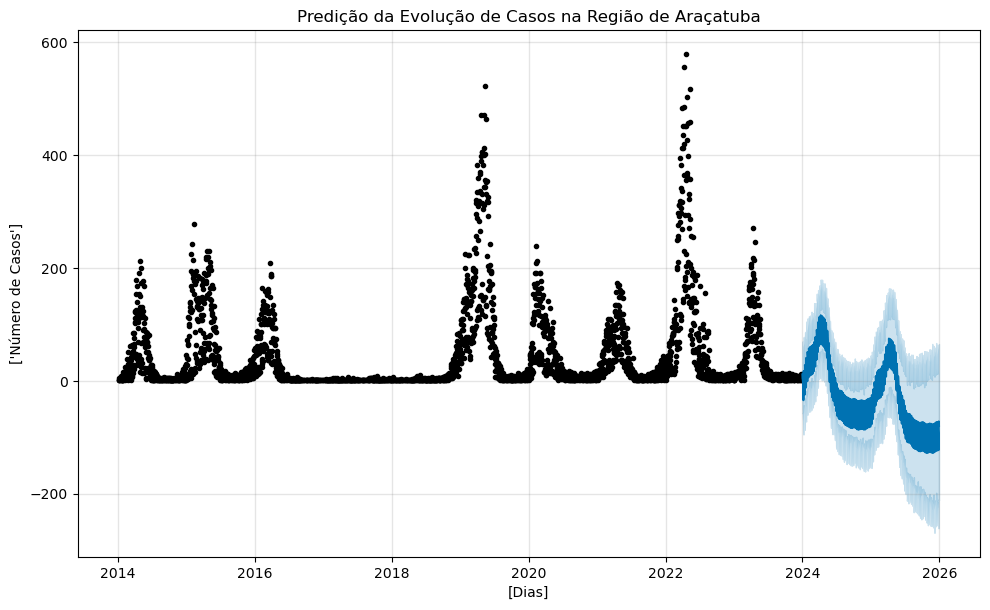

17:00:23 - cmdstanpy - INFO - Chain [1] start processing
17:00:24 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 640x480 with 0 Axes>

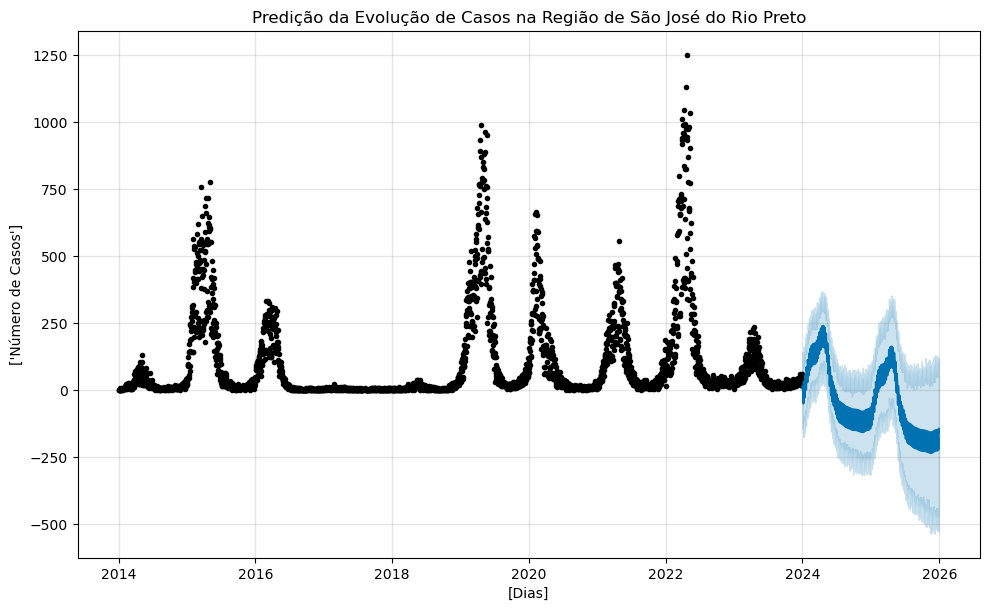

17:00:24 - cmdstanpy - INFO - Chain [1] start processing
17:00:24 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 640x480 with 0 Axes>

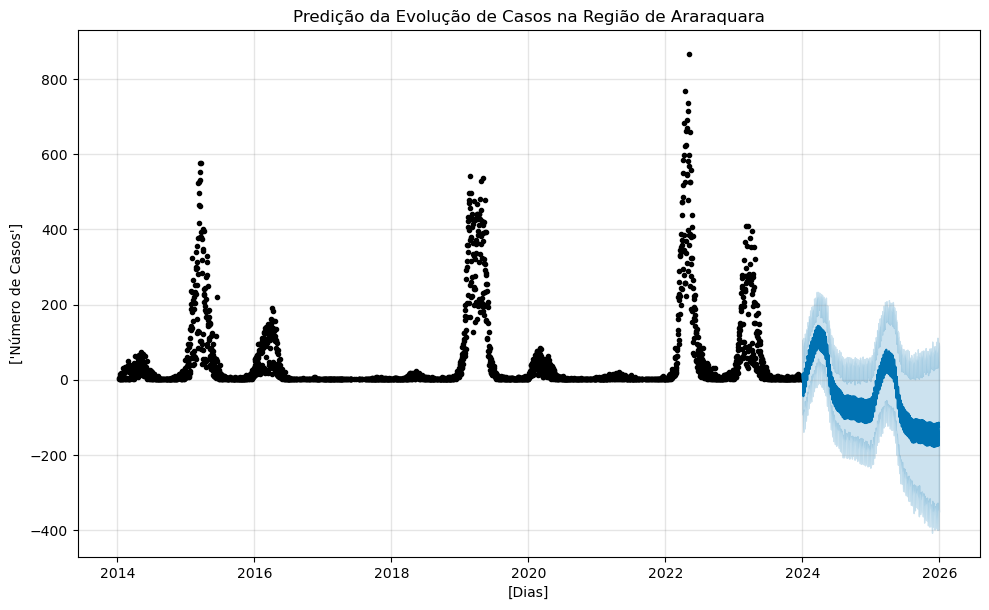

17:00:25 - cmdstanpy - INFO - Chain [1] start processing
17:00:26 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 640x480 with 0 Axes>

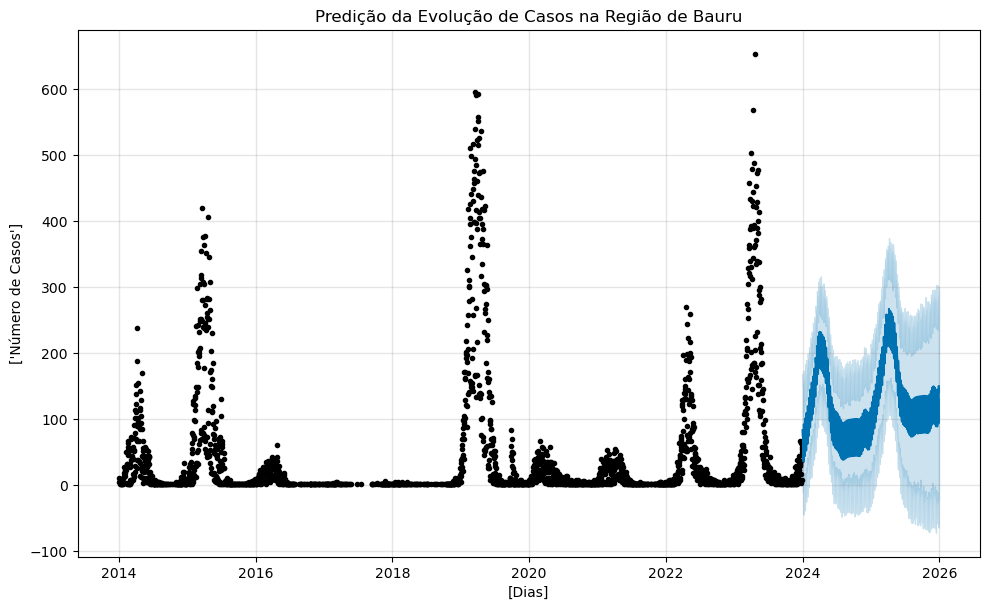

17:00:26 - cmdstanpy - INFO - Chain [1] start processing
17:00:26 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 640x480 with 0 Axes>

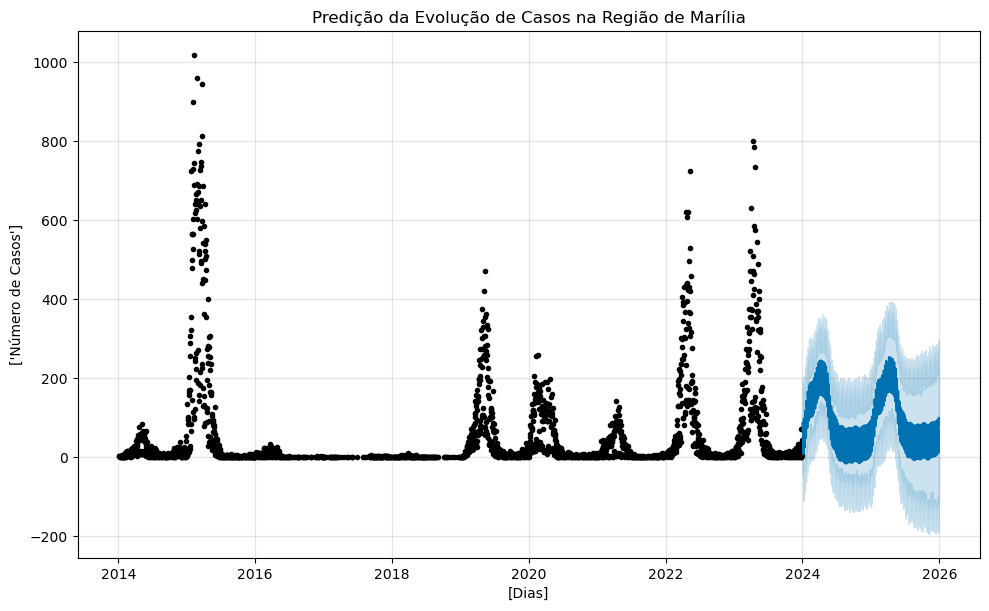

17:00:27 - cmdstanpy - INFO - Chain [1] start processing
17:00:27 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 640x480 with 0 Axes>

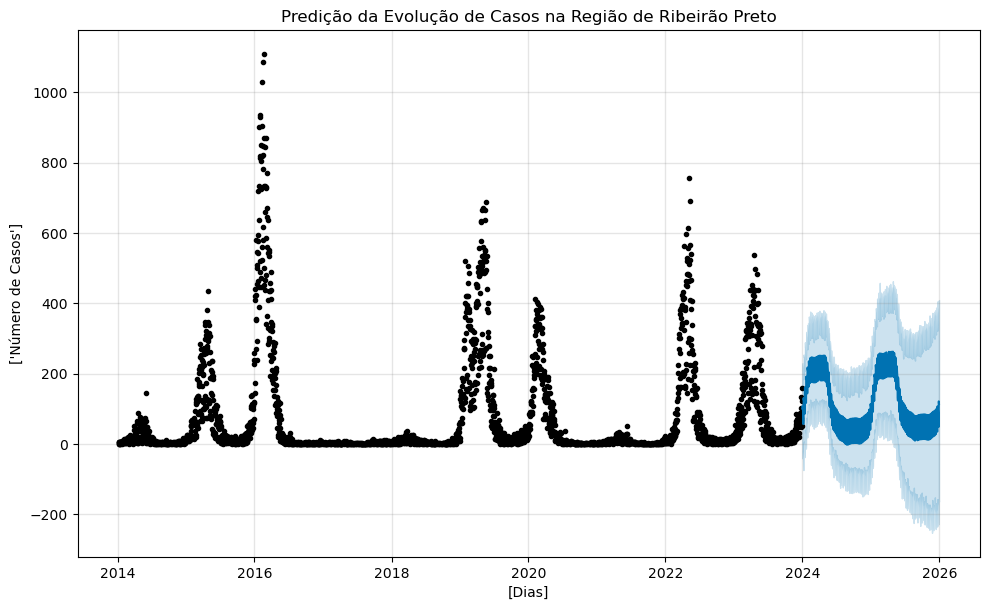

17:00:28 - cmdstanpy - INFO - Chain [1] start processing
17:00:28 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 640x480 with 0 Axes>

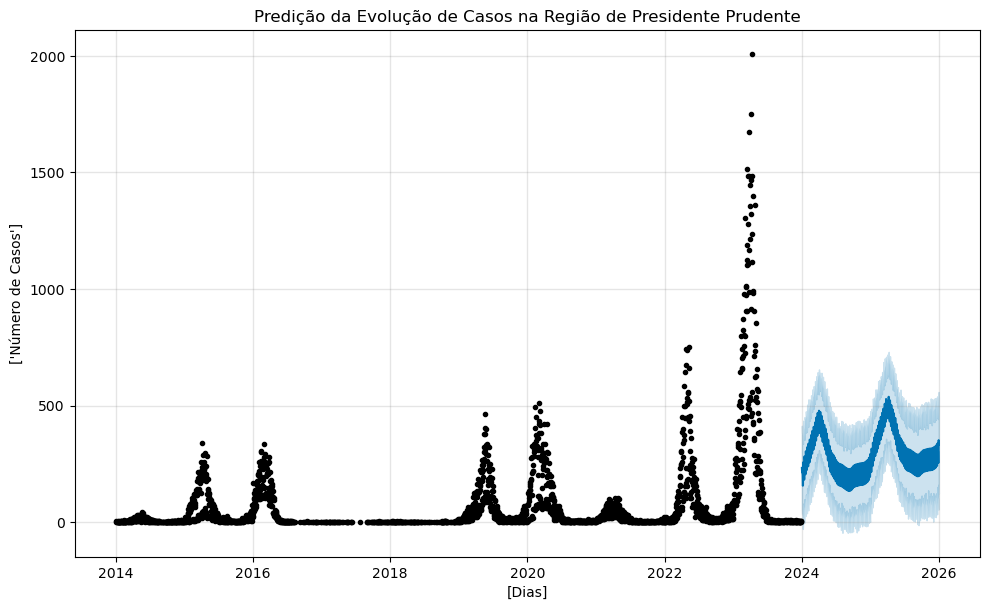

17:00:28 - cmdstanpy - INFO - Chain [1] start processing
17:00:29 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 640x480 with 0 Axes>

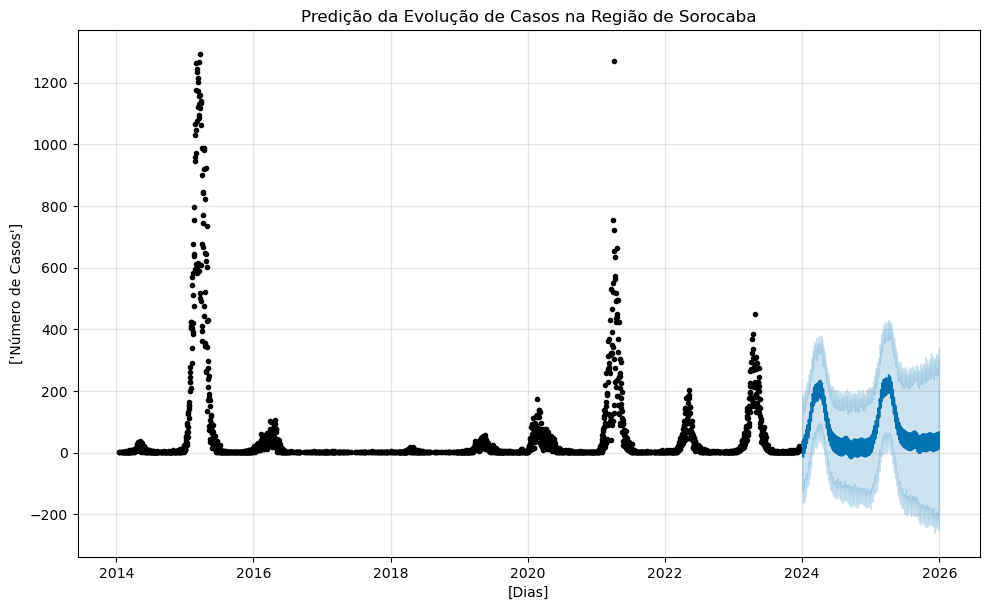

In [63]:
nregioes = len(regioes)

for k1 in range (0,nregioes):

    dfregiao = ldfreg[k1]
    model = Prophet()
    model.fit(dfregiao)
    forecast = model.predict(future)
    plt.figure()
    fig = model.plot(forecast)
    plt.xlabel('[Dias]')
    plt.ylabel(['Número de Casos'])
    plt.title('Predição da Evolução de Casos na Região de %s'%regioes[k1])
    plt.show()
    fig.savefig('%s/predicaots%d.png'%(locsave,k1),dpi=400,bbox_inches='tight')
    plt.close()

### 4.3 SP - Full - Tunning

In [ ]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [ ]:
param_space = dict(growth = ['linear', 'logistic', 'flat'],
                   n_changepoints  = range(0, 55, 5),
                   changepoint_range  = uniform(0.5, 0.5),
                   yearly_seasonality = [True, False],
                   weekly_seasonality = [True, False],
                   daily_seasonality = [True, False],
                   seasonality_mode = ['additive', 'multiplicative'],
                   seasonality_prior_scale=uniform(5.0, 15.0),
                   changepoint_prior_scale=uniform(0.0, 0.1),
                   interval_width = uniform(0.2, 0.8),
                   uncertainty_samples = [500, 1000, 1500, 2000]
                   )

In [ ]:
days_test = 100
train = df_sp_full.drop(df_sp_full.index[-days_test:])
y_true = df_sp_full['y'][-days_test:].values
future = df_sp_full['ds'][-days_test:].values
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

In [ ]:
def objective_function(args_list):

    global train, y_true
    
    params_evaluated = []
    results          = []
    
    for params in args_list:
        
        try:
        
            model = Prophet(**params)
            model.fit(train)
            forecast = model.predict(future)
            error = mape(y_true,forecast['yhat'])
            params_evaluated.append(params)
            results.append(error)
            
        except:

            params_evaluated.append(params)
            results.append(10000000000000000000000000000000.0)
        
    return params_evaluated, results

In [ ]:
conf_Dict = dict()
conf_Dict['initial_random'] = 10
conf_Dict['num_iteration']  = 50
tuner = Tuner(param_space, objective_function, conf_Dict)
results = tuner.minimize()
print('best parameters:', results['best_params'])
print('best loss:', results['best_objective'])

In [ ]:
days_test = 100
train = df_sp_full.drop(df_sp_full.index[-days_test:])
y_true = df_sp_full['y'][-days_test:].values
future = df_sp_full['ds'][-days_test:].values
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

params_win = results['best_params']
model = Prophet(**params_win)
model.fit(train)
forecast = model.predict(future)

In [ ]:
y_pred = forecast['yhat']
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()